In [178]:
import json
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [179]:
with open('logins.json', 'r') as file:
    data = json.load(file)

In [180]:
#time_stamps = data['login_time']

In [181]:
df = pd.DataFrame(data)

In [182]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [183]:
df['login_time'] = pd.to_datetime(df['login_time'])

In [184]:
df['id'] = 1

In [185]:
df.head()

,login_time,id
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [186]:
df_agg = pd.DataFrame(df.groupby([pd.Grouper(key='login_time', freq='15Min')]).sum()).reset_index()

In [187]:
df_agg.head()

,login_time,id
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [188]:
df_agg.tail()

,login_time,id
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7
9787,1970-04-13 18:45:00,6


(array([  0.,  14.,  31.,  45.,  59.,  73.,  90., 104.]),
 [Text(0.0, 0, '1970-01-01'),
  Text(14.0, 0, '1970-01-15'),
  Text(31.0, 0, '1970-02-01'),
  Text(45.0, 0, '1970-02-15'),
  Text(59.0, 0, '1970-03-01'),
  Text(73.0, 0, '1970-03-15'),
  Text(90.0, 0, '1970-04-01'),
  Text(104.0, 0, '1970-04-15')])

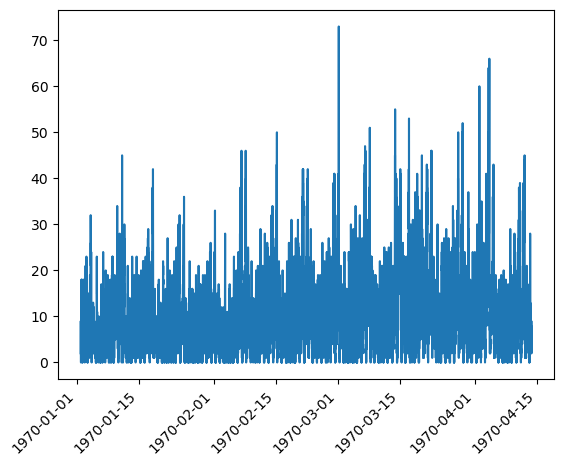

In [189]:
plt.plot(df_agg.login_time, df_agg['id'])
plt.xticks(rotation=45, ha='right')

In [190]:
day_dat = df_agg.iloc[16:112]

(array([1.   , 1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   ]),
 [Text(1.0, 0, '01-02 00'),
  Text(1.125, 0, '01-02 03'),
  Text(1.25, 0, '01-02 06'),
  Text(1.375, 0, '01-02 09'),
  Text(1.5, 0, '01-02 12'),
  Text(1.625, 0, '01-02 15'),
  Text(1.75, 0, '01-02 18'),
  Text(1.875, 0, '01-02 21'),
  Text(2.0, 0, '01-03 00')])

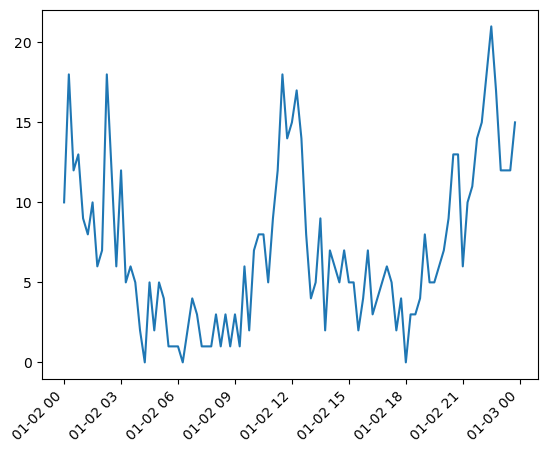

In [191]:
plt.plot(day_dat.login_time, day_dat['id'])
plt.xticks(rotation=45, ha='right')

It seems access peak around 2.00 am, noon and 8.00 pm.

## Part 2

1. Change in toll revenue, traffic data change - if there is an effect then there would be less traffic and decrease in toll revenue.

2. Announce a month long experiment. Gather data such as traffic data, toll revenue, peak time traffice data and the number of cars. Then conduct an A/B testing. Througfh statistical tests and EDA one could decide if there was a difference in traffic jams in the city. 

## Part 3

In [192]:
with open('ultimate_data_challenge.json', 'r') as file:
    data = json.load(file)

In [193]:
df = pd.DataFrame(data)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [194]:
df.shape

(50000, 12)

In [195]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [196]:
df.dropna(inplace=True)

In [197]:
df.shape

(41445, 12)

In [198]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [199]:
df.drop(columns=['city','signup_date','last_trip_date','phone'], inplace = True)

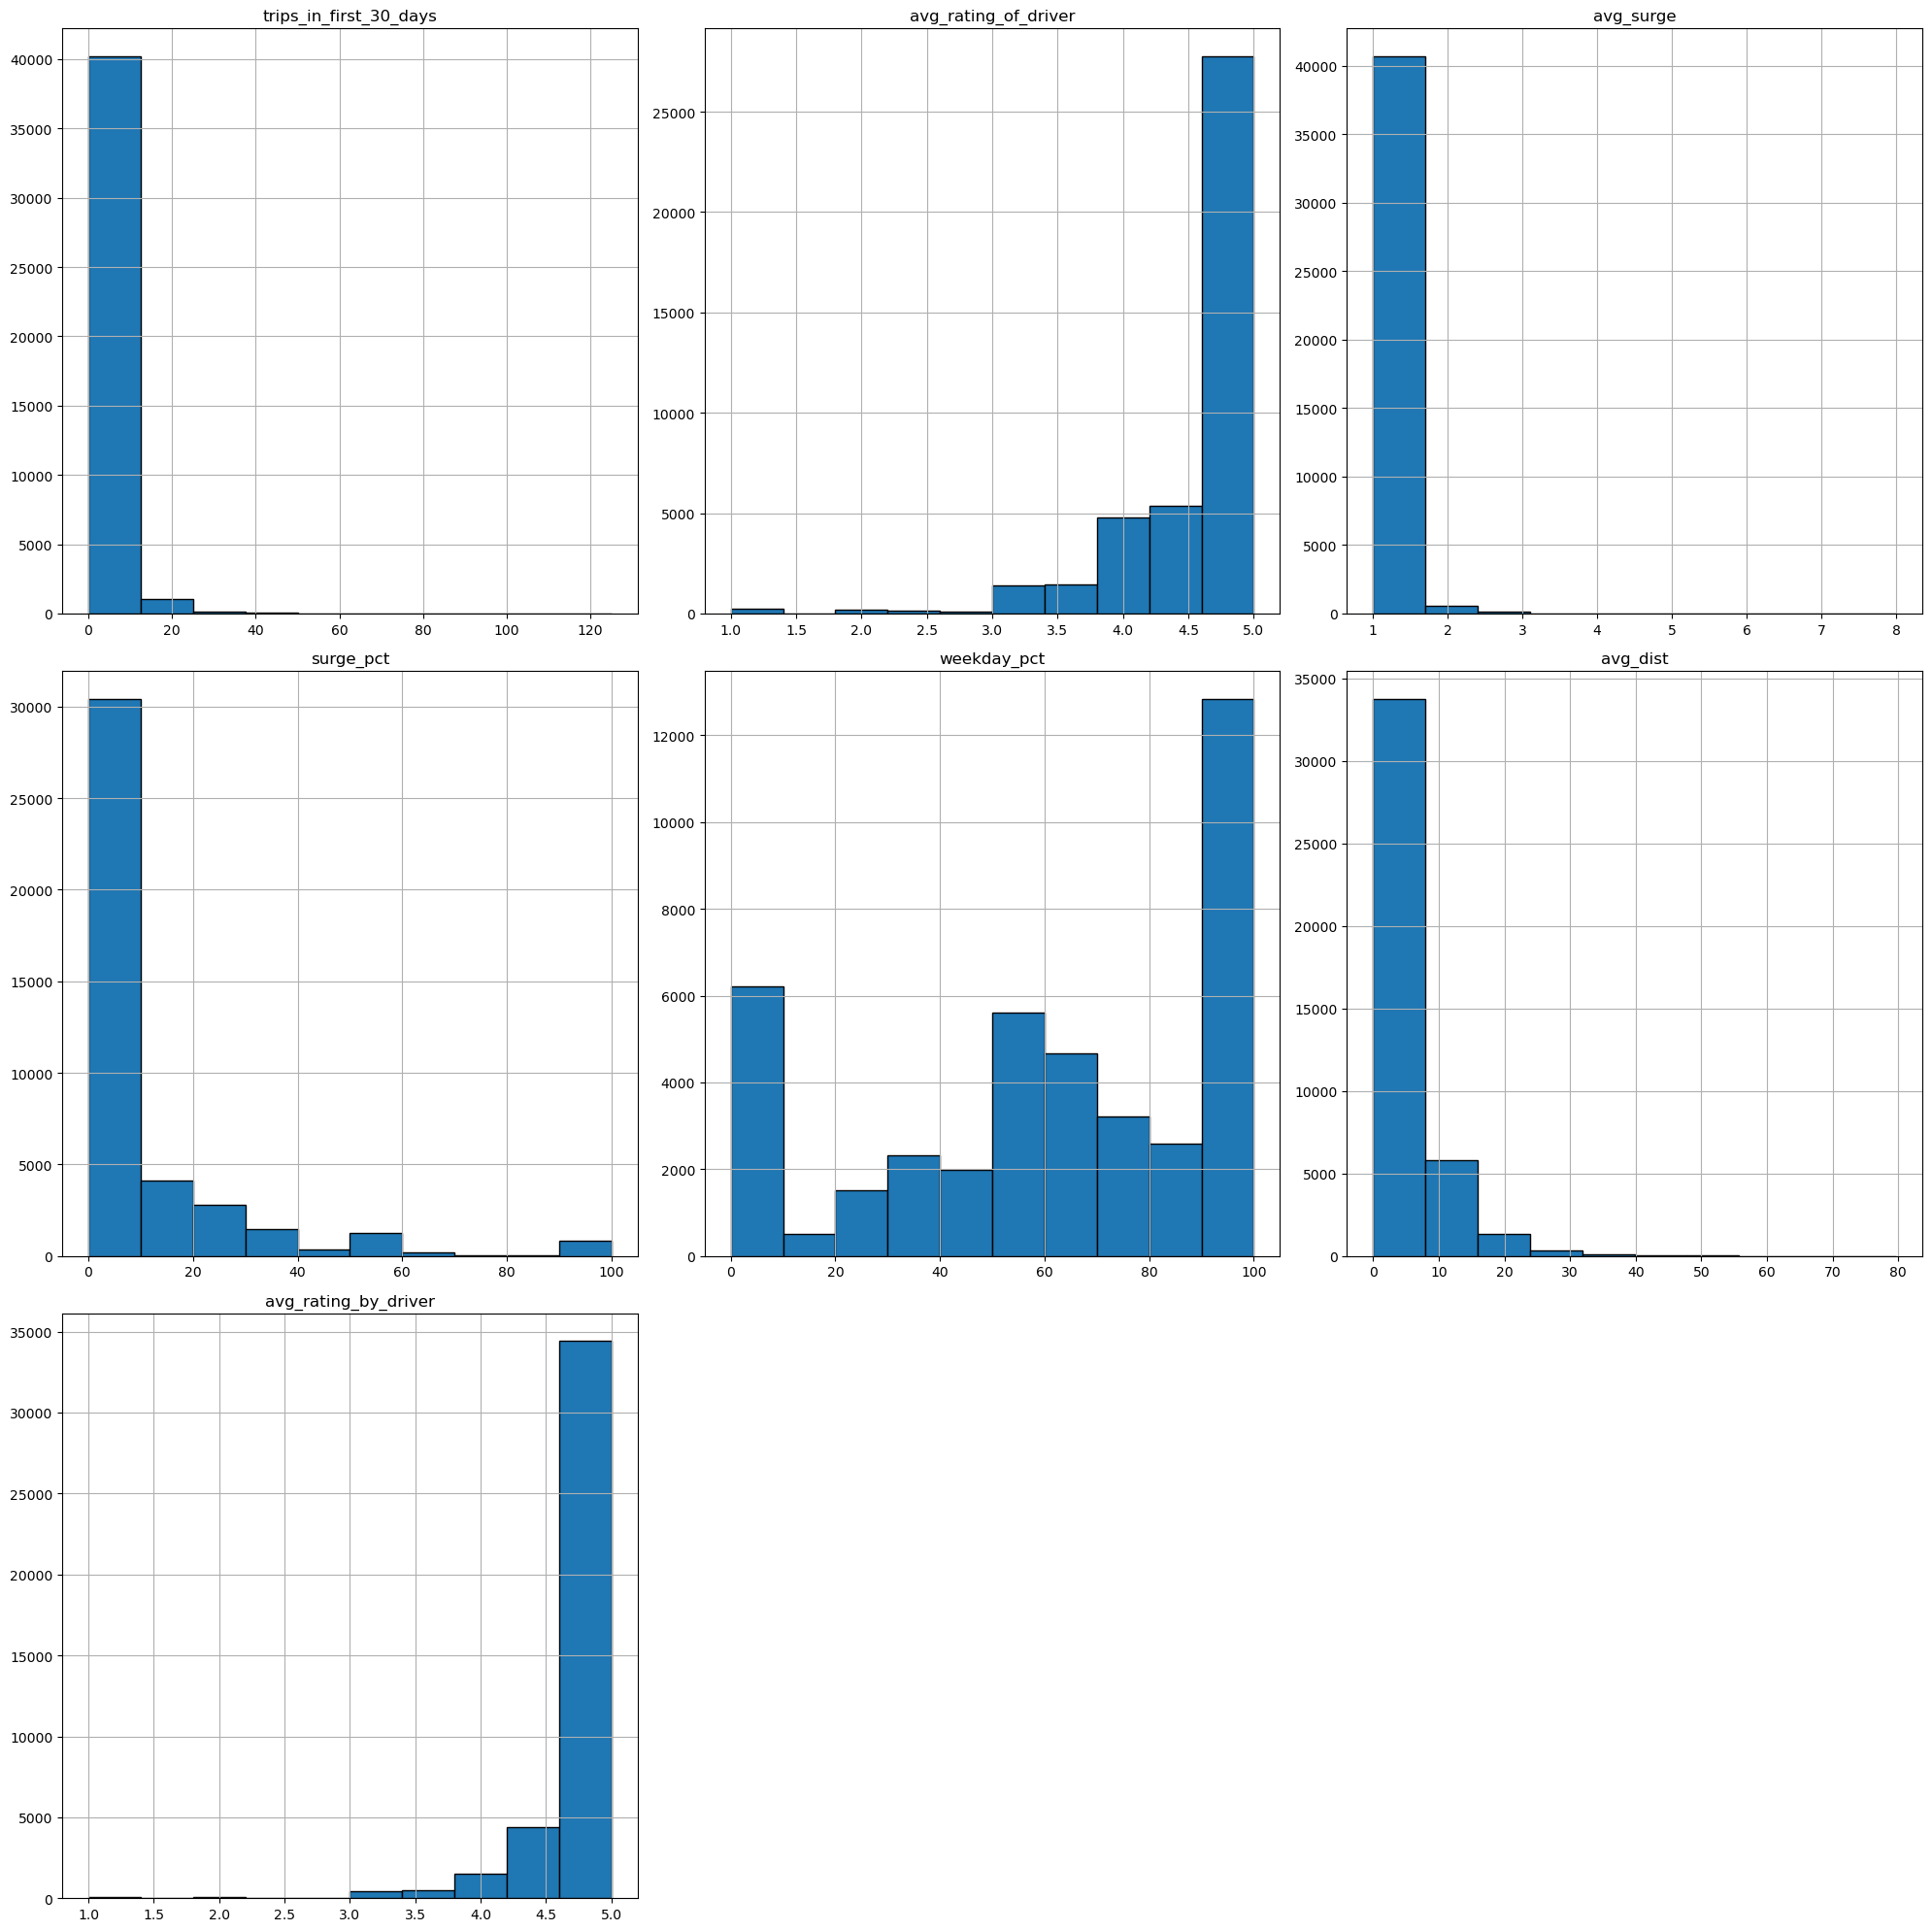

In [200]:
df.hist(figsize=(20,20),ec="k")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

In [201]:
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)

In [202]:
X = df.drop(columns = ['ultimate_black_user'])
y = df['ultimate_black_user']

In [203]:
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,4,4.7,1.10,15.4,46.2,3.67,5.0
1,0,5.0,1.00,0.0,50.0,8.26,5.0
2,3,4.3,1.00,0.0,100.0,0.77,5.0
3,9,4.6,1.14,20.0,80.0,2.36,4.9
4,14,4.4,1.19,11.8,82.4,3.13,4.9


In [204]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X.copy(),y.copy(),shuffle=True,random_state=153,stratify=y,test_size=.2)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [205]:
kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 582)

In [206]:
y_train = y_train.to_numpy()

In [207]:
j = 0
precision_mat = np.zeros((1,5))
recall_mat = np.zeros((1,5))
accuracy_mat = np.zeros((1,5))

for train_index, test_index in kfold.split(X_train_scaled, y_train):
    #print(train_index)
    ### Training
    X_train_train = X_train_scaled[train_index,:]
    y_train_train = y_train[train_index]
    
    ### Holdout set
    X_holdout = X_train_scaled[test_index,:]
    y_holdout = y_train[test_index]
       
    
    rm = RandomForestClassifier(n_estimators = 400)
    
    
    rm.fit(X_train_train,
            y_train_train)
    
    y_preds = rm.predict(X_holdout)
   
    
    precision_mat[0,j] = precision_score(y_holdout, y_preds,average="binary", pos_label=1)
    recall_mat[0,j] = recall_score(y_holdout, y_preds,average="binary", pos_label=1)
    accuracy_mat[0,j] = accuracy_score(y_holdout, y_preds)
    
    
    
    j += 1

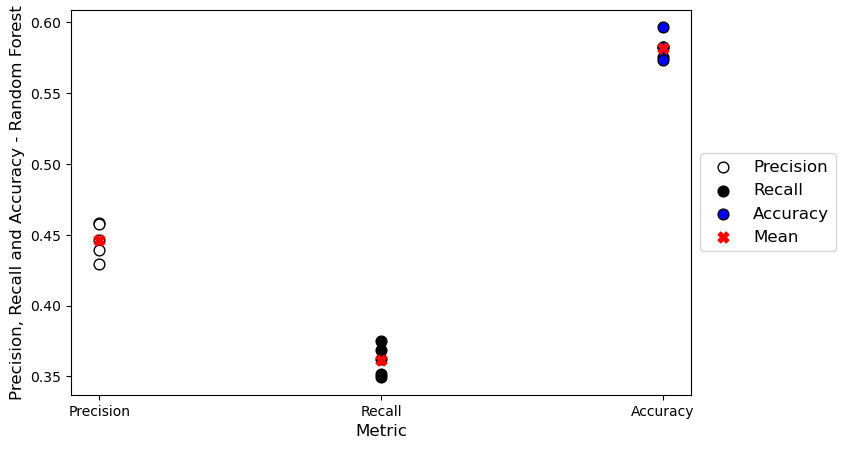

In [208]:
plt.figure(figsize=(8,5))
plt.scatter(np.zeros(5), 
            precision_mat[0,:], 
            s=60, 
            c='white',
            edgecolor='black',
            label="Precision")
plt.scatter(np.ones(5), 
            recall_mat[0,:], 
            s=60, 
            c='black',
            edgecolor='black',label ="Recall")

plt.scatter(np.ones(5)*2, 
            accuracy_mat[0,:], 
            s=60, 
            c='blue',
            edgecolor='black',label ="Accuracy")

plt.scatter([0,1,2], 
            [np.mean(precision_mat, axis=1),np.mean(recall_mat, axis=1),np.mean(accuracy_mat, axis=1)], 
            s=60, 
            c='r',
            marker='X',
            label="Mean")

plt.annotate(f'Mean Precision:{np.mean(precision_mat, axis=1)}', xy=(0,0.67))
plt.annotate(f'Mean Recall:{np.mean(recall_mat, axis=1)}', xy=(0.2,0.85))
plt.annotate(f'Mean Accuracy:{np.mean(accuracy_mat, axis=1)}', xy=(1.25,0.67))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)

plt.xticks([0,1,2],["Precision", "Recall","Accuracy"], fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Metric", fontsize=12)
plt.ylabel("Precision, Recall and Accuracy - Random Forest", fontsize=12)

plt.show()

#### Not the best results - would benefit from hyperparameter tuning.

### Use the model on the test set

In [209]:
rm = RandomForestClassifier(n_estimators = 400)
    
    
rm.fit(X_train_scaled,
            y_train)
    
y_preds = rm.predict(X_test_scaled)

In [210]:
precision = precision_score(y_test, y_preds,average="binary", pos_label= 1)
recall = recall_score(y_test, y_preds,average="binary", pos_label= 1)
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy',accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy 0.5738931113523947
Precision: 0.43507462686567167
Recall: 0.36620603015075376


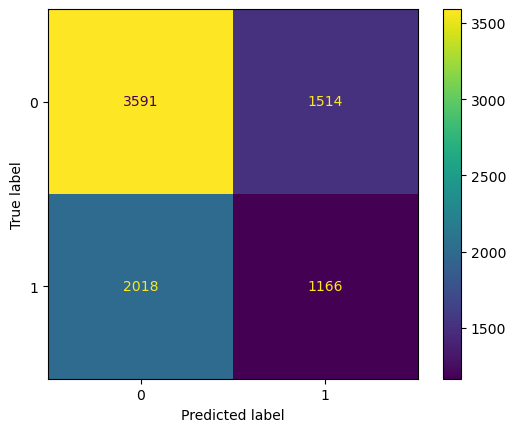

In [211]:
cm_new = confusion_matrix(y_test, y_preds)

ConfusionMatrixDisplay(confusion_matrix=cm_new).plot();

The model doesn't do well with labeling True values. I think hyperparameter tuning and more feature engineering would help.